[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.82
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94 

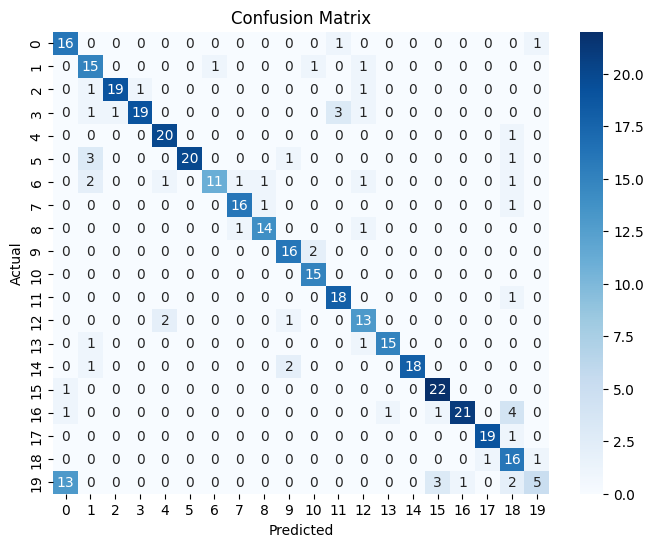

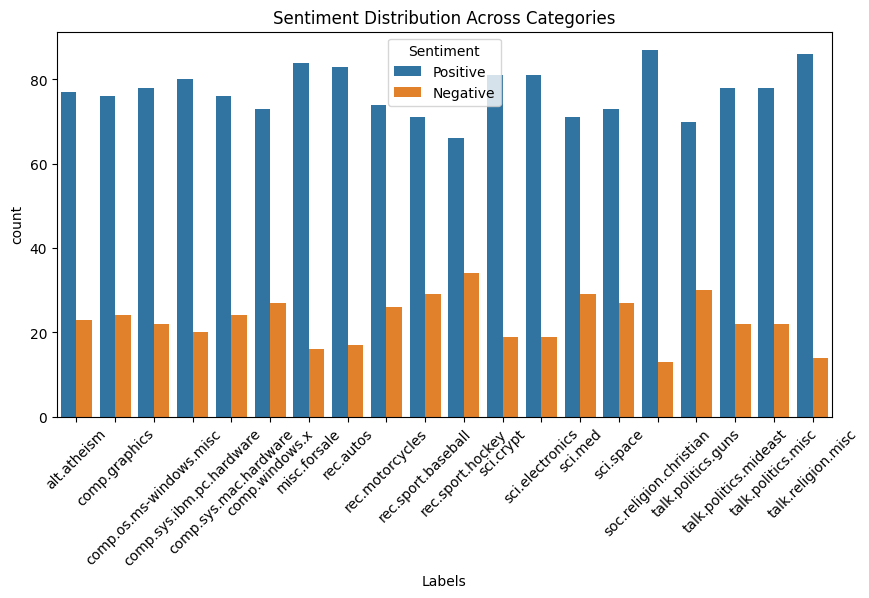

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


In [7]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

file_path = "/content/sample_data/blogs.csv"
df = pd.read_csv(file_path)

df.columns = ['Data', 'Labels']
df.dropna(inplace=True)

# Text preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = text.split()  # Instead of nltk word_tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

df['Cleaned_Data'] = df['Data'].apply(clean_text)

# TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Data'])
y = df['Labels']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Sentiment Analysis
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Data'].apply(get_sentiment)

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Labels', hue='Sentiment')
plt.xticks(rotation=45)
plt.title('Sentiment Distribution Across Categories')
plt.show()

# Display sentiment analysis summary
print(df.groupby(['Labels', 'Sentiment']).size().unstack())


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision :", precision_score(y_test, y_pred, average='macro'))
print("Recall :", recall_score(y_test, y_pred, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred, average='macro'))


Precision : 0.8350444534724726
Recall : 0.8307618303926521
F1 Score : 0.8161108619346633


Model Performance and Challenges

The Naive Bayes classifier achieved an accuracy of 82%, indicating strong performance in classifying blog posts into their respective categories. Categories like rec.sport.hockey and sci.space had high precision and recall, suggesting the model effectively distinguishes these topics. However, categories such as talk.religion.misc had low recall, meaning many instances were misclassified. This could be due to overlapping vocabulary between religious and political discussions. A key challenge was handling imbalanced categories, where some labels had fewer samples, leading to misclassification.

Sentiment Analysis Reflection

The sentiment analysis categorized blog posts as positive, negative, or neutral, providing insights into their emotional tone. Certain topics, like rec.sport.baseball and rec.motorcycles, had more positive sentiment, likely due to enthusiasm in sports and hobbies. This analysis helps understand the tone and emotional impact of different blog categories, which can be useful for content moderation, targeted recommendations, or audience engagement strategies.